In [2]:
import numpy as np
import awkward as ak
import uproot
import src.functions as fn
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import cm
import networkx as nx

In [3]:
#%matplotlib inline

import mplhep as hep

# Make plots look more HEP-like
plt.style.use(hep.style.ROOT)

In [3]:
filename2 = "/afs/cern.ch/user/d/dmagdali/CernCentralityProject/tracksters_ds_200e.root"
datasetName="10e dataset"
file2 = uproot.open(filename2)
tracksters10e=file2['tracksters']

In [4]:
print(tracksters10e.keys())
vertices10e_Labels=tracksters10e['trackster_label'].array()
vertices10e_indexes=tracksters10e['vertices_indexes'].array()
vertices10e_x = tracksters10e['vertices_x'].array()
vertices10e_y = tracksters10e['vertices_y'].array()
vertices10e_z = tracksters10e['vertices_z'].array()
vertices10e_E = tracksters10e['vertices_energy'].array()


['nvertices_x', 'vertices_x', 'nvertices_y', 'vertices_y', 'nvertices_z', 'vertices_z', 'nvertices_energy', 'vertices_energy', 'nvertices_indexes', 'vertices_indexes', 'trackster_label', 'trackster_event']


In [5]:
comPosZ=[]
incPosZ=[]

N_tr = len(vertices10e_indexes)
#N_tr=1000

for i in range(N_tr):
    v_z=vertices10e_z[i]
    """
    v_ind=vertices10e_indexes[i]
    v_x=vertices10e_x[i] 
    v_y=vertices10e_y[i]
    v_z=vertices10e_z[i]
    v_E=vertices10e_E[i] 
    edges_1 = fn.edgeBuilderNew(
        v_ind,
        v_x, 
        v_y, 
        v_z, 
        v_E
    )
    edges_1 = ak.flatten(edges_1[ak.num(edges_1) > 0].to_list())
    """
    for z in v_z:
        if(vertices10e_Labels[i]==1):
            comPosZ.append(z)
        else:
            incPosZ.append(z)



In [6]:
comPosZ=np.asarray(comPosZ)
incPosZ=np.asarray(incPosZ)

In [7]:
print(comPosZ)

[323.04724121 325.07275391 326.01724243 ... 357.74273682 358.68725586
 360.71273804]


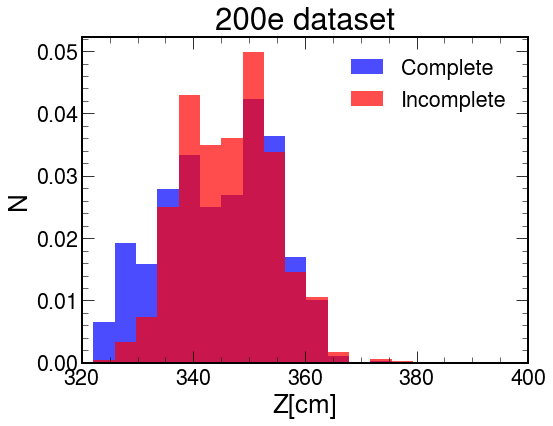

In [8]:
#%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comPosZ, bins=50, color='b',density=True, alpha=0.7,label='Complete')
plt.hist(incPosZ, bins=50, color='r', alpha=0.7,density=True,label='Incomplete')
plt.legend()
plt.ylabel("N")
plt.xlabel("Z[cm]")
plt.title("200e dataset")
plt.xlim(320,400)
plt.show()

In [4]:
#filename="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225846/0000/hgcalNtuple_1.root"
filename="/eos/user/c/chpapage/TICL_samples/CloseByDoubleGamma_E100Eta1p62Delta5_CMSSW_12_4_0_upgrade2026_D86_clue3Dv4_ntuples/220701_225928/0000/ntuples.root"
file = uproot.open(filename)
tracksters=file["ana/tracksters"]
clusters=file["ana/clusters"]

In [5]:

vertices_indexes = tracksters['vertices_indexes'].array()
vertices_x = tracksters['vertices_x'].array()
vertices_y = tracksters['vertices_y'].array()
vertices_z = tracksters['vertices_z'].array()
vertices_E = tracksters['vertices_energy'].array()

In [6]:
print(len(vertices_indexes))

500


In [7]:
def plotEvent(fig,ax,tracksters,nEvent):
    indexes = tracksters['vertices_indexes'].array()[nEvent]
    x = tracksters['vertices_x'].array()[nEvent]
    y = tracksters['vertices_y'].array()[nEvent]
    z = tracksters['vertices_z'].array()[nEvent]
    E = tracksters['vertices_energy'].array()[nEvent]
    NTracks=len(x)
    #print(NTracks)
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Y (cm)')
    ax.set_zlabel('Z (cm)')
    colmap = cm.ScalarMappable(cmap=cm.viridis)
    
    for i in range(NTracks):
        yg =ax.scatter(x[i], y[i], z[i], marker='o') 
    
    
    plt.show()

<IPython.core.display.Javascript object>


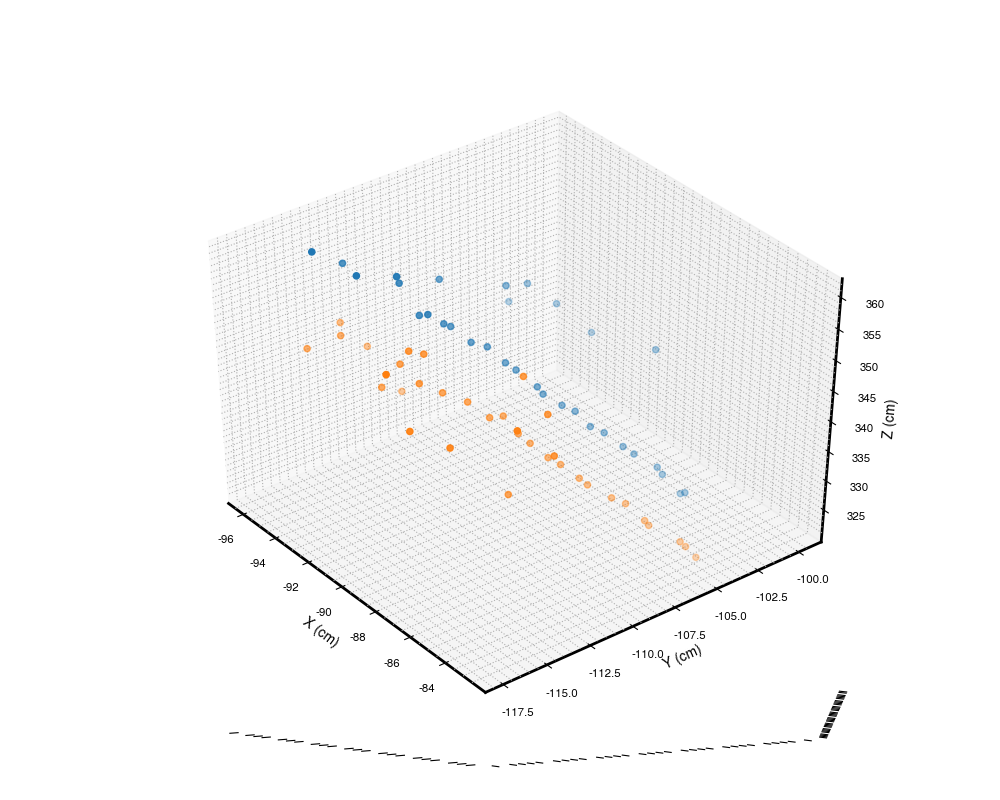

In [14]:
%matplotlib notebook

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

plotEvent(fig,ax,tracksters,101)